Import Statement

In [323]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Data Exploration

In [324]:
tesla = pd.read_csv('Tesla/TSLA Testing.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,22/6/2022,234.503326,246.833328,233.826660,236.086670,236.086670,101107500
1,23/6/2022,237.906662,239.316666,228.636673,235.070007,235.070007,104202600
2,24/6/2022,237.470001,246.066666,236.086670,245.706665,245.706665,95770800
3,27/6/2022,249.366669,252.070007,242.566666,244.919998,244.919998,89178300
4,28/6/2022,244.483337,249.970001,232.343338,232.663330,232.663330,90391200


In [325]:
tesla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,14/6/2023,260.170013,261.570007,250.500000,256.790009,256.790009,170575500
247,15/6/2023,248.399994,258.950012,247.289993,255.899994,255.899994,160171200
248,16/6/2023,258.920013,263.600006,257.209991,260.540009,260.540009,167563700
249,20/6/2023,261.500000,274.750000,261.119995,274.450012,274.450012,165611200
250,21/6/2023,275.130005,276.989990,257.779999,259.459991,259.459991,210937500


In [326]:
tesla.shape

(251, 7)

In [327]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [328]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,210.688220,215.466162,205.595405,210.655936,210.655936,1.208421e+08
std,51.496805,52.164593,50.789028,51.421134,51.421134,4.971209e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.635002,182.419998,172.504998,178.474998,178.474998,8.141040e+07
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.102522e+08
75%,247.361671,251.520004,241.084999,245.224998,245.224998,1.569024e+08
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08


Check data type in each column

In [329]:
tesla.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Change Date column type from object to datetime

In [330]:
tesla['Date'] = pd.to_datetime(tesla.Date)

C:\Users\natth\AppData\Local\Temp\ipykernel_23352\2693315006.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  tesla['Date'] = pd.to_datetime(tesla.Date)


Calculate % stock return from daily closing price 

In [331]:
pct_return = tesla['Close'].pct_change()
tesla.insert(7,"Return",pct_return)
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2022-06-22,234.503326,246.833328,233.826660,236.086670,236.086670,101107500,NaN
1,2022-06-23,237.906662,239.316666,228.636673,235.070007,235.070007,104202600,-0.004306
2,2022-06-24,237.470001,246.066666,236.086670,245.706665,245.706665,95770800,0.045249
3,2022-06-27,249.366669,252.070007,242.566666,244.919998,244.919998,89178300,-0.003202
4,2022-06-28,244.483337,249.970001,232.343338,232.663330,232.663330,90391200,-0.050044


In [332]:
tesla['Return'].fillna(0)


0      0.000000
1     -0.004306
2      0.045249
3     -0.003202
4     -0.050044
         ...   
246   -0.007421
247   -0.003466
248    0.018132
249    0.053389
250   -0.054618
Name: Return, Length: 251, dtype: float64

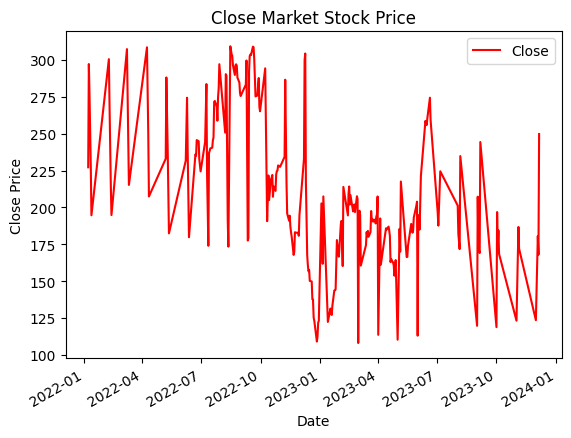

In [341]:
# Sort the DataFrame by Month and Year
tesla = tesla.sort_values(by=['Date'])

# Plotting date vs the close market stock price
tesla.plot('Date','Close',color="red")

plt.ylabel('Close Price')
plt.title('Close Market Stock Price')

plt.show()

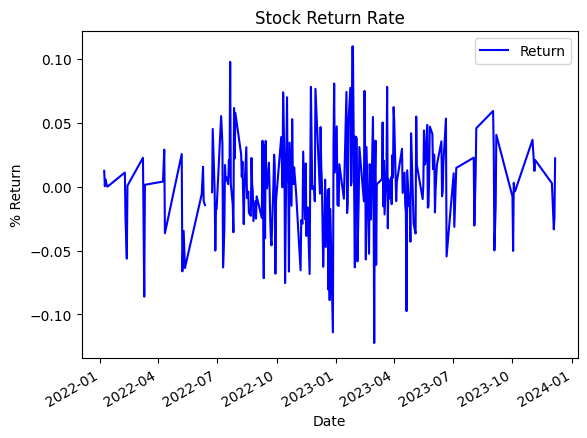

In [340]:
# Plotting month-year vs the stock return percentage
tesla = tesla.sort_values(by=['Date'])
tesla.plot('Date','Return',color="Blue")
plt.ylabel('% Return')
plt.title('Stock Return Rate')
plt.show()